### State inference

In [19]:
import numpy as np
import mab_subjects
from banditpy.models.policy import StateInference2Arm
from banditpy.models import DecisionModel

exp = mab_subjects.mostly_unstruc.BGF1[0]
task = exp.b2a.filter_by_trials(100, 100)
probs = task.probs[task.is_session_start, :]
policy = StateInference2Arm()
policy.set_params({"c": 0.3, "y": 0.9, "b0": 0.9, "beta": 9.0})
task_sim = DecisionModel.simulate_policy(
    policy=policy,
    reward_schedule=probs,
    min_trials_per_block=100,
    prob_switch=0.02,
)

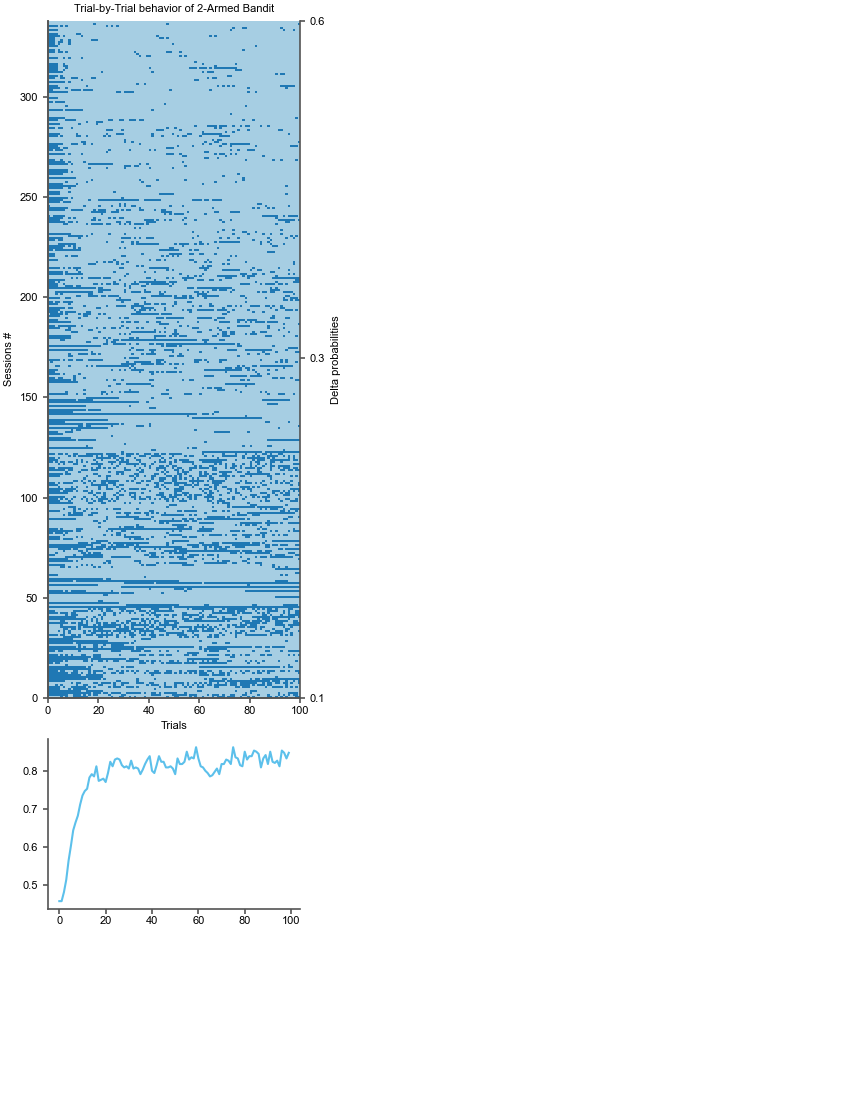

In [21]:
import matplotlib.pyplot as plt
from neuropy import plotting
from banditpy.plots import plot_trial_by_trial_2Arm

fig = plotting.Fig(6, 3)

ax = fig.subplot(fig.gs[0:4, 0])
plot_trial_by_trial_2Arm(
    task_sim.filter_by_trials(100, 100), sort_by_deltaprob=True, ax=ax
)

ax = fig.subplot(fig.gs[4, 0])
ax.plot(task_sim.filter_by_trials(100, 100).get_optimal_choice_probability())